Overview
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.


Attribute Information

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

# Reducción de dimensión

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Carga de Base de datos relacionada con la gestión de las bicicletas

In [2]:
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2024-10-11 22:19:00--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.04s   

2024-10-11 22:19:01 (1.14 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


# Clasificación

In [3]:
# importar librerias relacionadas con la clasificación
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Carga de Base de datos para clasificación

In [5]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,high_rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,0
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,1
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,0
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,0


In [7]:
# Crear una nueva columna 'high_rentals' como objetivo para clasificación
bike_data['high_rentals'] = bike_data['rentals'].apply(lambda x: 1 if x > 500 else 0)

# Seleccionar las características (puedes elegir otras características)
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed']

# Definir X y y
X = bike_data[features]
y = bike_data['high_rentals']

In [8]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [9]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Precisión del modelo SVM: {accuracy_svm}')


Precisión del modelo SVM: 0.9090909090909091


In [31]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

# Print classification report to the console
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        76
           1       0.94      0.92      0.93       144

    accuracy                           0.91       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.91      0.91      0.91       220



### Explicación:
1. **`SVC(probability=True)`**: Este parámetro activa el cálculo de las probabilidades en el modelo SVM, lo que es necesario para generar la curva ROC.
2. **`predict_proba`**: Al igual que con LDA, usamos este método para obtener las probabilidades predichas de la clase positiva (`[:, 1]`).
3. **`roc_curve` y `auc`**: Calculamos la curva ROC y el área bajo la curva (AUC), lo que permite evaluar el rendimiento del modelo en términos de sensibilidad (tasa de verdaderos positivos) y especificidad (tasa de falsos positivos).

Este código te permitirá visualizar la curva ROC y medir el AUC para tu modelo SVM.

In [33]:
from sklearn.metrics import roc_curve, auc, accuracy_score
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Obtener las probabilidades predichas (para la clase positiva)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

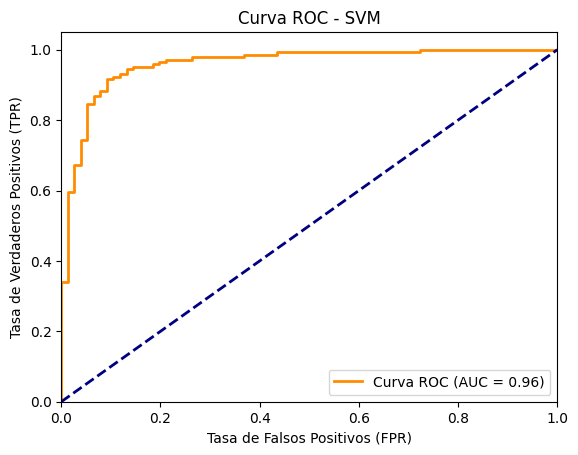

In [35]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()

LDA:

La **Análisis Discriminante Lineal (LDA, por sus siglas en inglés)** es una técnica de clasificación supervisada que busca separar clases mediante la maximización de la separación entre ellas. LDA asume que las clases siguen una distribución normal (gaussiana) y tienen la misma matriz de covarianza, lo que lo hace eficiente para problemas donde estas suposiciones son válidas.

### Conceptos clave de LDA:
1. **Objetivo**: Encontrar una o más líneas (fronteras de decisión) que maximicen la separación entre clases. LDA proyecta los datos en un espacio de menor dimensión (por ejemplo, en una línea), donde las clases están lo más separadas posible.

2. **Separación de clases**: LDA maximiza la varianza entre las clases y minimiza la varianza dentro de las clases para encontrar una proyección óptima. Esto implica que LDA busca que los puntos de la misma clase estén cerca entre sí, pero que las diferentes clases estén lo más separadas posible en el espacio proyectado.

3. **Asunción de distribución normal**: LDA asume que los datos de cada clase tienen una distribución gaussiana (normal) con la misma matriz de covarianza, lo que permite crear las fronteras de decisión lineales entre las clases.

4. **Aplicaciones**: LDA se usa frecuentemente en problemas de clasificación binaria o multiclase, y también se puede aplicar para reducción de dimensionalidad cuando el objetivo es reducir las características antes de una clasificación.

### Flujo del modelo:
1. **Entrenamiento**: Durante el entrenamiento, LDA estima los parámetros de la distribución (medias y covarianzas) para cada clase.
2. **Predicción**: En la fase de predicción, LDA asigna una nueva observación a la clase cuya probabilidad condicional es mayor (dada por la distancia a las medias proyectadas de las clases).

Es útil en problemas donde las clases tienen fronteras lineales y la clasificación se basa en la proyección de los datos en un espacio con dimensiones reducidas, pero puede ser limitado si las clases no son linealmente separables o si las distribuciones no son gaussianas.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Crear y entrenar el modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lda = lda_model.predict(X_test_scaled)

# Evaluar el modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Precisión del modelo LDA: {accuracy_lda}')


Precisión del modelo LDA: 0.9090909090909091


In [13]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_lda)
class_report = classification_report(y_test, y_pred_lda)

# Print classification report to the console
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        76
           1       0.92      0.94      0.93       144

    accuracy                           0.91       220
   macro avg       0.90      0.89      0.90       220
weighted avg       0.91      0.91      0.91       220



In [24]:
# Obtener las probabilidades predichas (para la clase positiva)
y_pred_proba_lda = lda_model.predict_proba(X_test_scaled)[:, 1]


In [25]:
from sklearn.metrics import roc_curve, auc, accuracy_score
# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lda)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

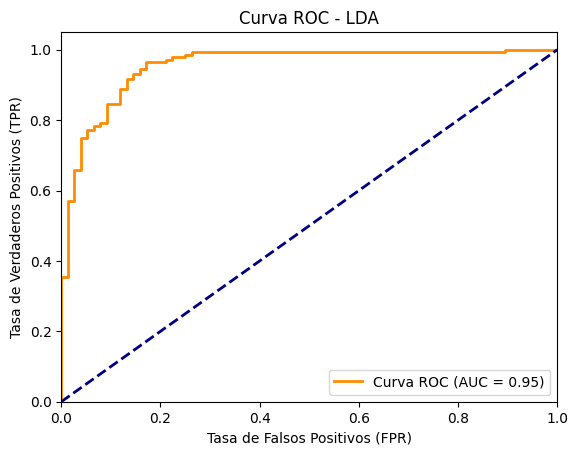

In [26]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - LDA')
plt.legend(loc="lower right")
plt.show()
